In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize


In [40]:
# load the dataset labels that we have created 
df = pd.read_csv('labels.csv')

In [41]:
df

,Image,Category,Defect Type
0,dataset\non_defective\non_defective_0.jpg,non_defective,NaN
1,dataset\non_defective\non_defective_1.jpg,non_defective,NaN
2,dataset\non_defective\non_defective_10.jpg,non_defective,NaN
3,dataset\non_defective\non_defective_11.jpg,non_defective,NaN
4,dataset\non_defective\non_defective_12.jpg,non_defective,NaN
5,dataset\non_defective\non_defective_13.jpg,non_defective,NaN
6,dataset\non_defective\non_defective_14.jpg,non_defective,NaN
7,dataset\non_defective\non_defective_15.jpg,non_defective,NaN
8,dataset\non_defective\non_defective_16.jpg,non_defective,NaN
9,dataset\non_defective\non_defective_17.jpg,non_defective,NaN


In [42]:
df.head(10)

,Image,Category,Defect Type
0,dataset\non_defective\non_defective_0.jpg,non_defective,NaN
1,dataset\non_defective\non_defective_1.jpg,non_defective,NaN
2,dataset\non_defective\non_defective_10.jpg,non_defective,NaN
3,dataset\non_defective\non_defective_11.jpg,non_defective,NaN
4,dataset\non_defective\non_defective_12.jpg,non_defective,NaN
5,dataset\non_defective\non_defective_13.jpg,non_defective,NaN
6,dataset\non_defective\non_defective_14.jpg,non_defective,NaN
7,dataset\non_defective\non_defective_15.jpg,non_defective,NaN
8,dataset\non_defective\non_defective_16.jpg,non_defective,NaN
9,dataset\non_defective\non_defective_17.jpg,non_defective,NaN


In [43]:
df.tail(10)

,Image,Category,Defect Type
30,dataset\defective\tear\tear_1.jpg,defective,tear
31,dataset\defective\tear\tear_10.jpg,defective,tear
32,dataset\defective\tear\tear_12.jpg,defective,tear
33,dataset\defective\tear\tear_13.jpg,defective,tear
34,dataset\defective\tear\tear_15.jpg,defective,tear
35,dataset\defective\tear\tear_17.jpg,defective,tear
36,dataset\defective\tear\tear_5.jpg,defective,tear
37,dataset\defective\tear\tear_7.jpg,defective,tear
38,dataset\defective\tear\tear_8.jpg,defective,tear
39,dataset\defective\tear\tear_9.jpg,defective,tear


In [44]:
df.describe()

,Image,Category,Defect Type
count,40,40,20
unique,40,2,3
top,dataset\non_defective\non_defective_0.jpg,non_defective,tear
freq,1,20,10


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image        40 non-null     object
 1   Category     40 non-null     object
 2   Defect Type  20 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [46]:
df.shape

(40, 3)

In [47]:
df.dtypes

Image          object
Category       object
Defect Type    object
dtype: object

In [93]:
df = pd.read_csv('labels.csv')

# Convert categorical columns to dummy variables 
df = pd.get_dummies(data = df, columns=['Image', 'Defect Type'])

# Split into features (X) and target (y)
x = df.drop(columns = ['Category'])
y = df['Category']


In [94]:
# Normalize the features
sc = StandardScaler()
x = sc.fit_transform(x)


In [95]:
# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)  # One-hot encoding of the labels


In [96]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state=1)


In [97]:
# Check the shape of the data
print("Shape of xtrain before reshaping:", xtrain.shape)

# If the dataset has 784 features per sample (28x28 image), reshape accordingly
if xtrain.shape[1] == 784:  
    xtrain = xtrain.reshape(-1, 28, 28, 1)
    xtest = xtest.reshape(-1, 28, 28, 1)
else:
    # Resize images to (28, 28) 
    xtrain_resized = np.array([resize(image, (28, 28), mode='reflect') for image in xtrain])
    xtest_resized = np.array([resize(image, (28, 28), mode='reflect') for image in xtest])
    
    # Reshape for CNN input
    xtrain_resized = xtrain_resized.reshape(-1, 28, 28, 1)
    xtest_resized = xtest_resized.reshape(-1, 28, 28, 1)

    # Use resized images
    xtrain = xtrain_resized
    xtest = xtest_resized

print("Shape of xtrain after reshaping:", xtrain.shape)


Shape of xtrain before reshaping: (32, 43)
Shape of xtrain after reshaping: (32, 28, 28, 1)


## CNN model 

In [98]:
model = Sequential()

#  the convolutional layers and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#  another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(ytrain.shape[1], activation='softmax'))


C:\Users\vaibh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [100]:
## Train the mode
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6250 - loss: 0.6758 - val_accuracy: 1.0000 - val_loss: 0.3983
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.4134 - val_accuracy: 1.0000 - val_loss: 0.2564
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 1.0000 - loss: 0.2554 - val_accuracy: 1.0000 - val_loss: 0.1786
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.1533 - val_accuracy: 1.0000 - val_loss: 0.1375
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.0910 - val_accuracy: 1.0000 - val_loss: 0.1083
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0776
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0342 - val_accuracy: 1.0000 - val_loss: 0.0498
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.

In [101]:
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f'Test Accuracy: {test_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.0154
Test Accuracy: 1.0


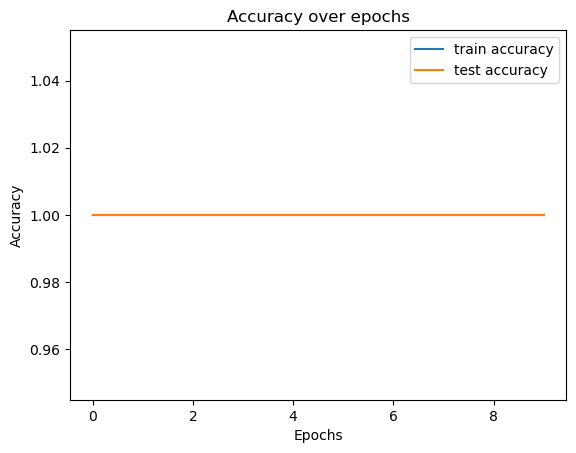

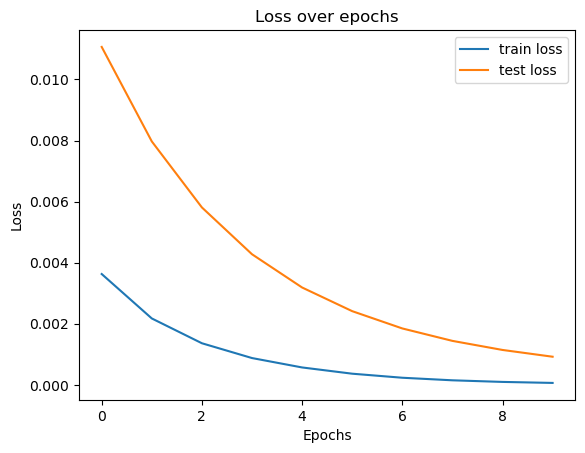

In [109]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [110]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 9.2002e-04
Test Loss: 0.0009200162021443248
Test Accuracy: 1.0


In [111]:
model.save('cnn_model.h5')


In [135]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(xtest_resized, ytest)
print(f'Test Accuracy: {test_accuracy}')

# Additional metrics
from sklearn.metrics import classification_report
y_pred = model.predict(xtest_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
ytest_classes = np.argmax(ytest, axis=1)

print(classification_report(ytest_classes, y_pred_classes, target_names=['Non-Defective', 'Defective']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 9.2002e-04
Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
               precision    recall  f1-score   support

Non-Defective       1.00      1.00      1.00         6
    Defective       1.00      1.00      1.00         2

     accuracy                           1.00         8
    macro avg       1.00      1.00      1.00         8
 weighted avg       1.00      1.00      1.00         8



In [139]:
new_image_path = 'C:\\Users\\vaibh\\OneDrive\\Desktop\\Task\\dataset\\non_defective'

In [ ]:
from tensorflow.keras.preprocessing import image
# Define the path to the new image
  # Replace with your image file pah

# Load and preprocess the image
new_image = image.load_img(new_image_path, target_size=(28, 28))  # Resize image to 28x28
new_image = image.img_to_array(new_image) / 255.0  # Normalize the image
new_image = np.expand_dims(new_image, axis=0)  # Add a batch dimension (shape becomes (1, 28, 28, 3))

# Make prediction
prediction = model.predict(new_image)
predicted_class = np.argmax(prediction)  # Get the predicted class index

# Output the predicted class
print("Predicted class:", 'Defective' if predicted_class == 1 else 'Non-Defective')
